In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy
from scipy import signal
import pandas as pd

def wiener_filter(data, template):
    data_fft = np.fft.fft(data)
    template_fft = np.fft.fft(template)
    data_fft_freqs = np.fft.fftshift(np.fft.fftfreq(data.size))
    template_fft_freqs = np.fft.fftshift(np.fft.fftfreq(template.size))

    w_filter = np.abs(np.fft.fft(data_fft * template_fft))
        
    return w_filter

def lorentzian(x, center_freq, gamma, a):
    return a * 0.5 * gamma**2 / (0.5 * gamma**2 + (x - center_freq)**2)

def lorentzify(signal, gamma, a=1/np.pi, center_freq=0, p=False):
    signal_fft = np.fft.fft(signal)
    signal_fft_freqs = np.fft.fftshift(np.fft.fftfreq(signal.size))
    if p:
        print("pre lorentz: ")
        timeseries_plot(signal_fft, freq=signal_fft_freqs, xlabel='freq', ylabel='power', title='FFT')
    signal_fft = signal_fft * lorentzian(signal_fft_freqs, center_freq, gamma, a)
    if p:
        print("lorentzified: ")
        timeseries_plot(signal_fft, freq=signal_fft_freqs, xlabel='freq', ylabel='power', title='FFT')
    return np.fft.ifft(signal_fft)

def timeseries_plot(data, freq=None, peaks=None, xlabel='time', ylabel='amplitude', title=None):
    plt.figure(figsize=(8,6))
    timesteps = np.arange(len(data))
    if freq is not None:
        timesteps = freq
    plt.plot(timesteps, data)
    if peaks is not None:
        plt.plot(peaks, data[peaks], 'xr')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if title is not None:
        plt.title(title)
    plt.show()
    
def spectrogram(signal):
    powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(lorentz_noise, Fs=6000)
    plt.xlabel('time')
    plt.ylabel('freq')
    print("matplotlib.spectrogram plot: ")
    plt.show()
    
def generate_template(params, alpha, amplitude, p=False):
    template_length = params['noise_length']
    template_timesteps = np.arange(template_length)
    template = amplitude * np.sin(alpha * np.square(template_timesteps))
    lorentz_template = lorentzify(template, params['linewidth'], p=p)
    return lorentz_template
    
def inject_signal(params, rng, pure_noise=False):
    noise_length = params['noise_length']
    white_noise = rng.standard_normal(noise_length)
    if pure_noise:
        return white_noise
    
    start_time = params['start_time']
    if params['start_time'] == False:
        start_time = np.random.randint(low=noise_length*0.25, high=noise_length*0.75)
    sig_length = noise_length - start_time
    sig_timesteps = np.arange(sig_length)
    signal = params['true_amplitude'] * np.sin(params['true_alpha'] * np.square(sig_timesteps))
    
    left_noise = white_noise[:start_time]
    left_zeros = np.zeros(len(left_noise))
    extended_sig = np.concatenate((left_zeros, signal), axis=None)
    sig_noise = white_noise + extended_sig
    
    lorentz_noise = lorentzify(sig_noise, params['linewidth'])
    return lorentz_noise

/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


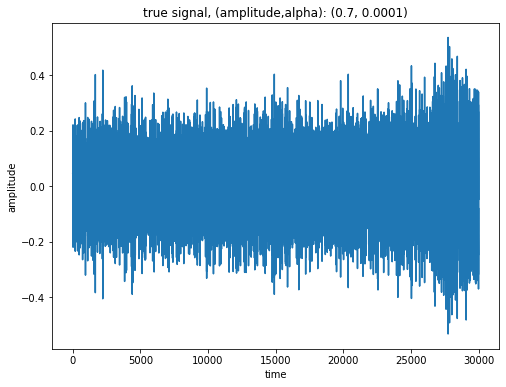

/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


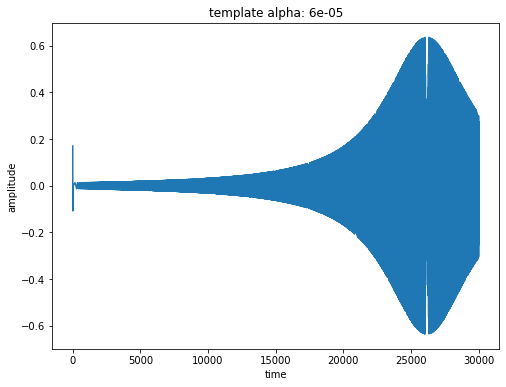

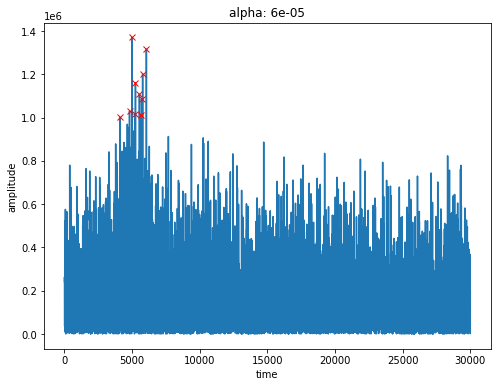

/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


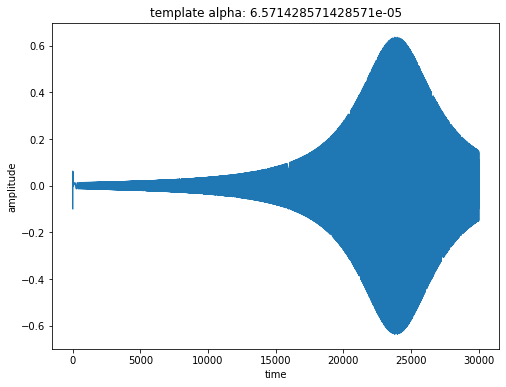

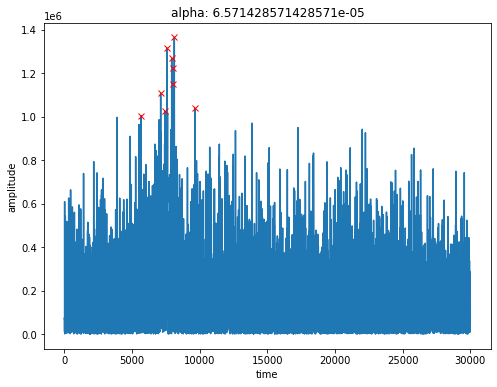

/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


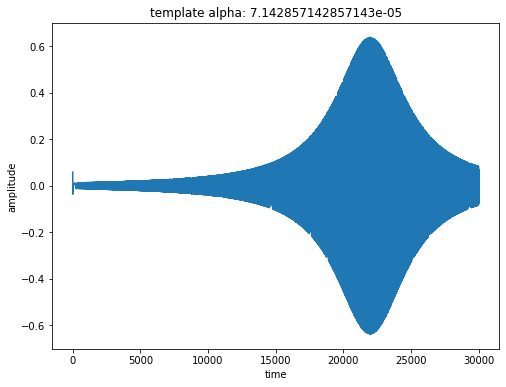

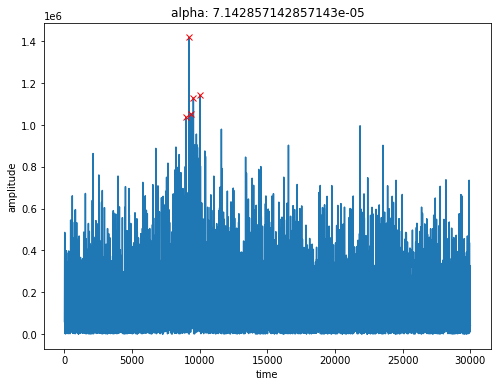

/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


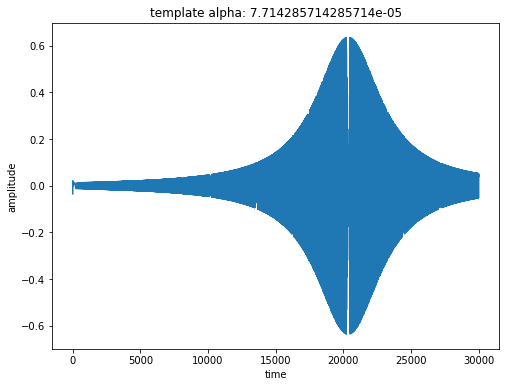

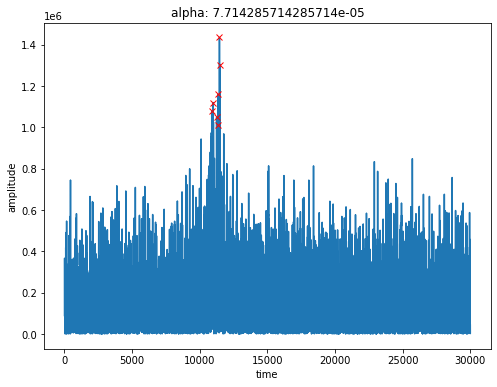

/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


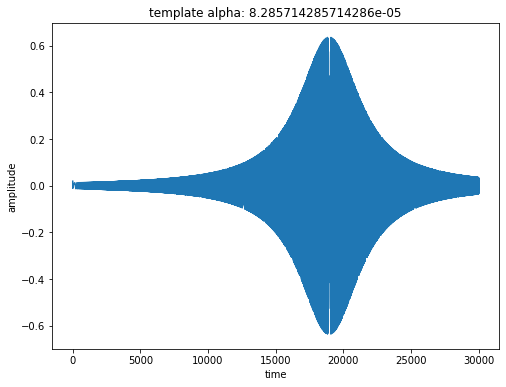

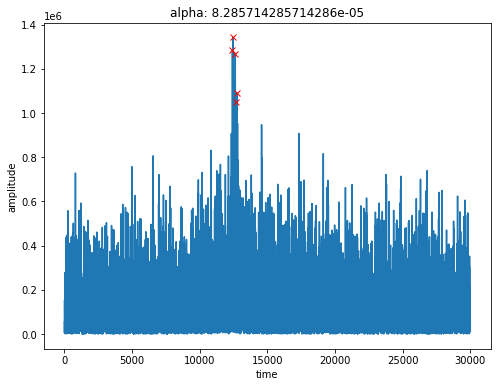

/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


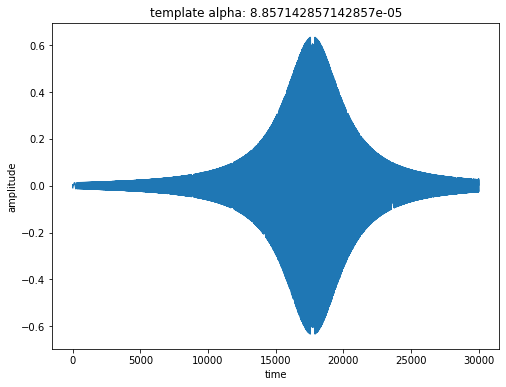

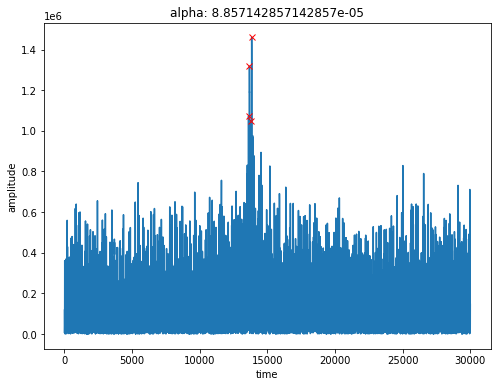

/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


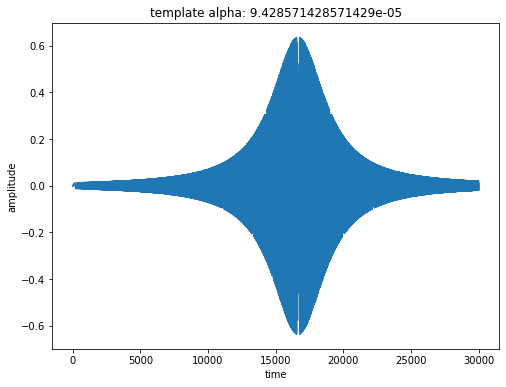

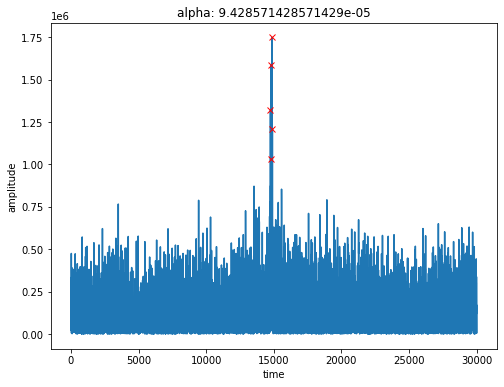

/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


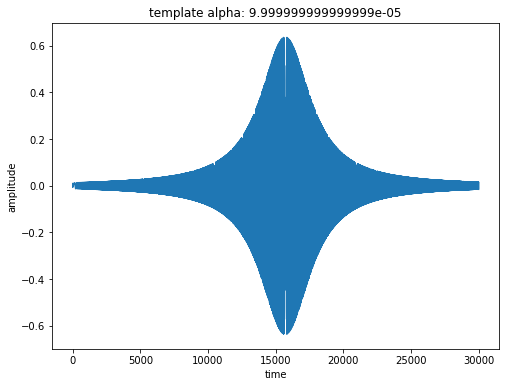

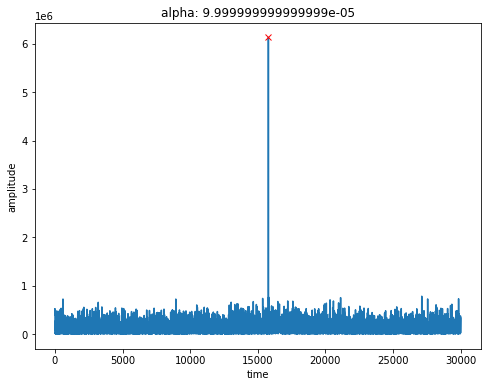

/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


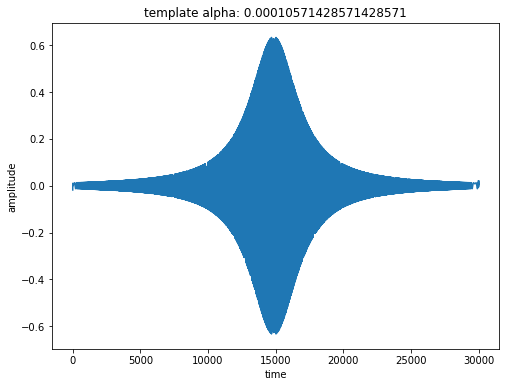

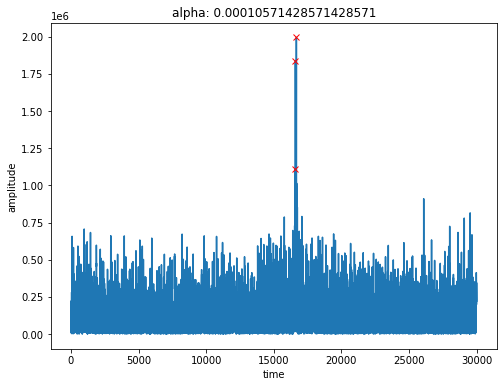

/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


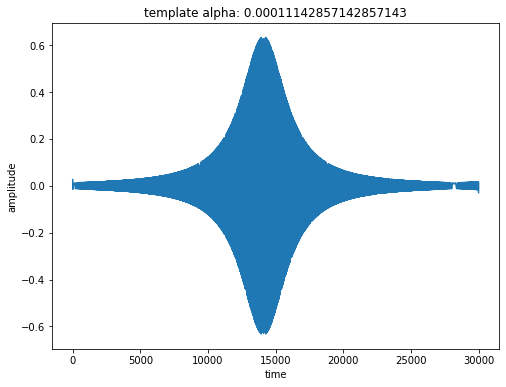

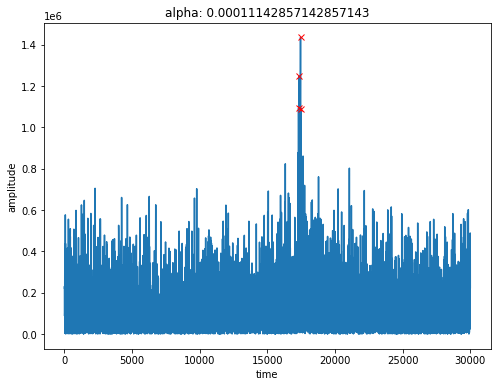

/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


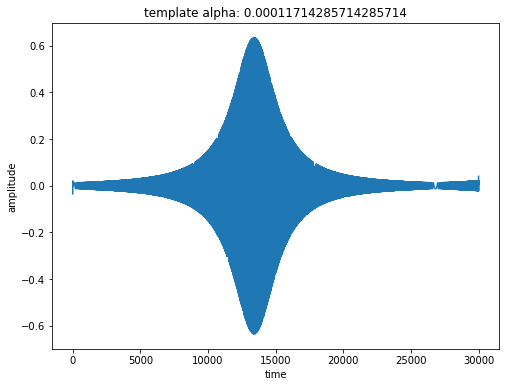

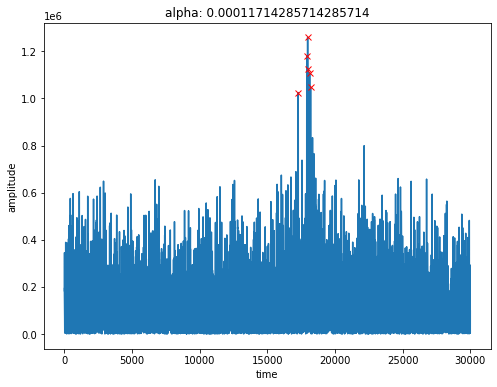

/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


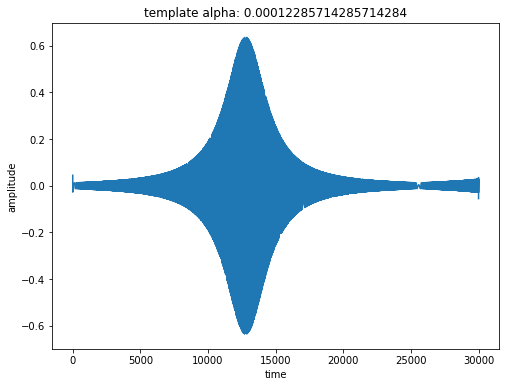

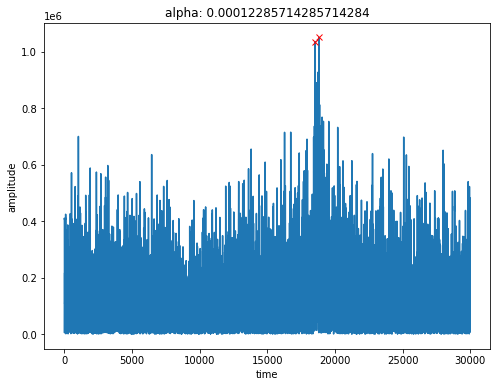

/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


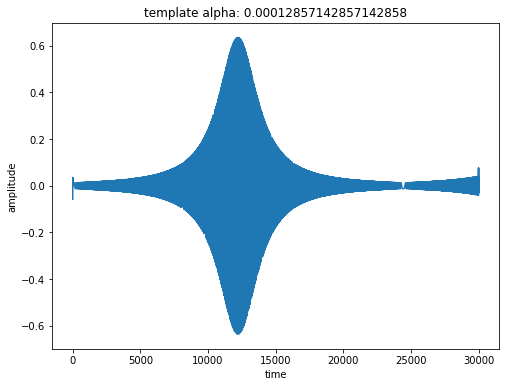

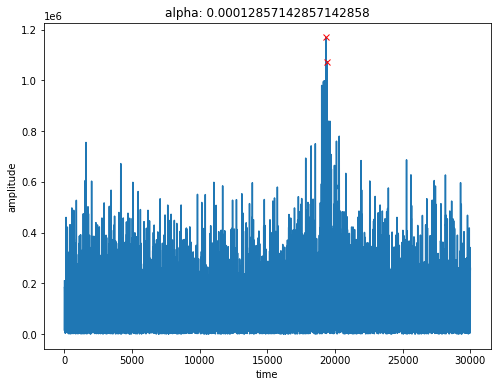

/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


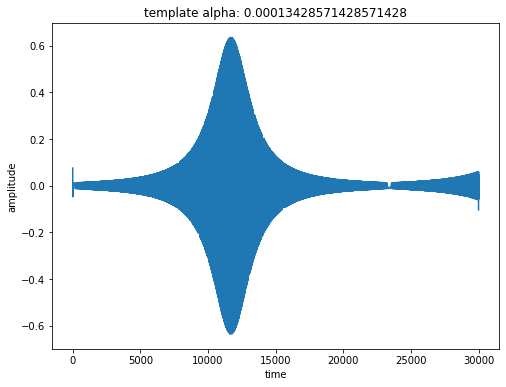

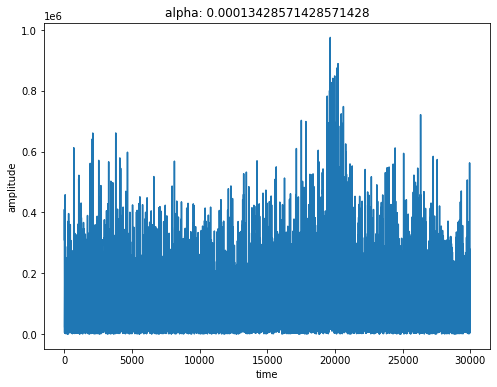

/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


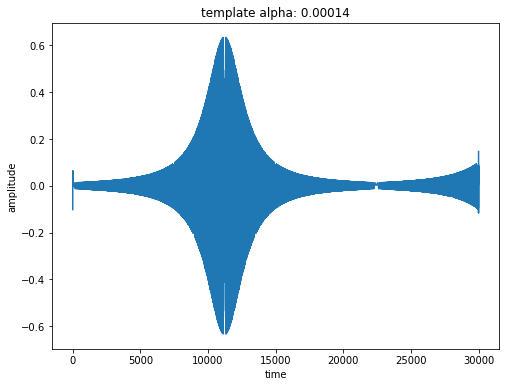

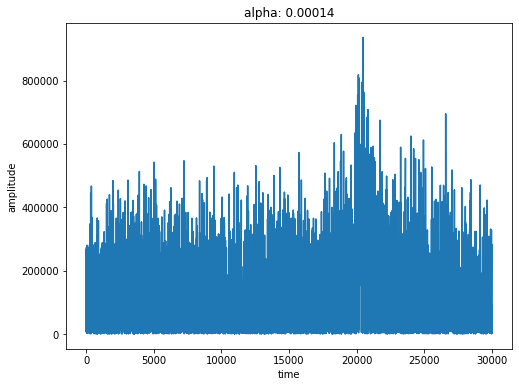

In [10]:
def init_params():
    params = {
        "rng": np.random.default_rng(),
        "noise_length": 30000,
        "start_time": 12800,
        "true_amplitude": 0.7,
        "true_alpha": 0.0001,
        "linewidth": 0.1,
        
        "lower_bound_alpha": 0.00006,
        "upper_bound_alpha": 0.00014,
        "spacing": 15,
        "temp_amplitude": 2
    }
    return params

def stack_data(stack, next_row):
    if stack is None:
        return np.expand_dims(np.array(next_row), axis=1)
    else:
        stack = np.concatenate((stack, np.expand_dims(np.array(next_row), axis=1)), axis=1)
        return stack

# Init params
params = init_params()
signal = inject_signal(params, params['rng'])
timeseries_plot(signal, title='true signal, (amplitude,alpha): ' + 
                str((params['true_amplitude'], params['true_alpha'])))
temp_alphas = np.linspace(params['lower_bound_alpha'], params['upper_bound_alpha'], num=params['spacing'])
timeseries2d = None
timeseries = None
peaks2d = []

# Perform grid search over alphas
for alpha in temp_alphas:
    template = generate_template(params, alpha, params['temp_amplitude'], p=False)
    timeseries_plot(template, title='template alpha: ' + str(alpha))
    filtered = wiener_filter(signal, template)
    peaks, _ = scipy.signal.find_peaks(filtered, prominence=1e6)
    timeseries_plot(filtered, peaks=peaks, title='alpha: ' + str(alpha))
    timeseries2d = stack_data(timeseries2d, filtered)
    if timeseries is None:
        timeseries = np.arange(len(filtered))
    peaks2d.append(peaks)

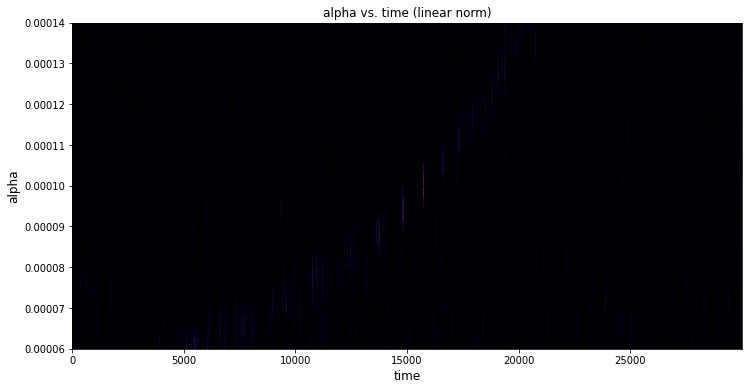

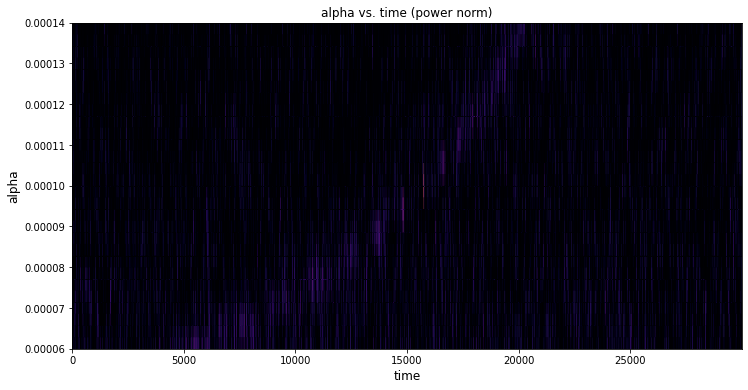

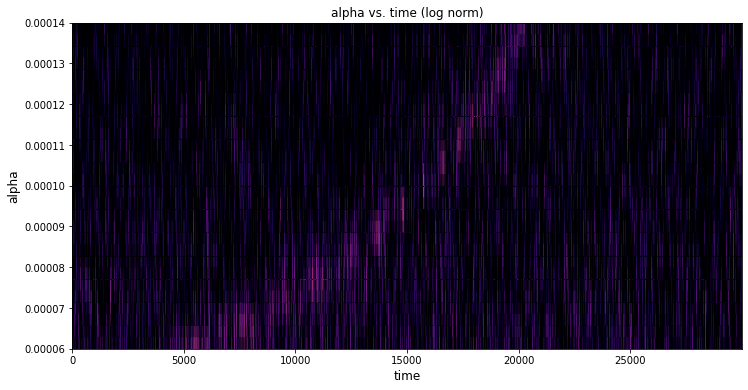

In [4]:
def colorplot(x, y, c, norm, title, shading='gouraud', cmap='magma'):
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(x, y, c, shading=shading, norm=norm, cmap=cmap)
    plt.title(title, fontsize=12)
    plt.xlabel('time', fontsize=12)
    plt.ylabel('alpha', fontsize=12)
    plt.show()

linnorm = colors.Normalize(vmin=np.mean(timeseries2d), vmax=np.amax(timeseries2d))
powernorm = colors.PowerNorm(vmin=np.mean(timeseries2d), vmax=np.amax(timeseries2d), gamma=0.65)
lognorm = colors.LogNorm(vmin=np.mean(timeseries2d), vmax=np.amax(timeseries2d))
x, y = np.meshgrid(timeseries, np.array(temp_alphas))
colorplot(x, y, np.transpose(timeseries2d), linnorm, title='alpha vs. time (linear norm)')
colorplot(x, y, np.transpose(timeseries2d), powernorm, title='alpha vs. time (power norm)')
colorplot(x, y, np.transpose(timeseries2d), lognorm, title='alpha vs. time (log norm)')

# Test zoom-in
# x_2, y_2 = np.meshgrid(timeseries[10000:20000], np.array(temp_alphas)[2:10])
# print(np.transpose(timeseries2d).shape)
# plt.pcolormesh(x_2, y_2, np.transpose(timeseries2d)[2:10, 10000:20000], shading='gouraud', norm=lognorm, cmap='magma')
# plt.show()


# check https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html

In [ ]:
# Incomplete Binning Cell

from functools import reduce

# Init params
params = init_params()
signal = inject_signal(params, params['rng'])
timeseries_plot(signal, title='true signal, (amplitude,alpha): ' + 
                str((params['true_amplitude'], params['true_alpha'])))
temp_alphas = np.linspace(params['lower_bound_alpha'], params['upper_bound_alpha'], num=params['spacing'])
timeseries2d = None
timeseries = None
peaks2d = []

# Perform grid search over alphas
for alpha in temp_alphas:
    template = generate_template(params, alpha, params['temp_amplitude'], p=False)
    timeseries_plot(template, title='template alpha: ' + str(alpha))
    filtered = wiener_filter(signal, template)
    peaks, _ = scipy.signal.find_peaks(filtered, prominence=1e6)
    timeseries_plot(filtered, peaks=peaks, title='alpha: ' + str(alpha))
    timeseries2d = stack_data(timeseries2d, filtered)
    if timeseries is None:
        timeseries = np.arange(len(filtered))
    peaks2d.append(peaks)

binned_timeseries = 